<a href="https://colab.research.google.com/github/A-Wozzie/C964/blob/main/Capstone_C964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
C964 Capstone Project - Adam Wojciechowski

---


# Import Libraries & Modules

In [19]:
from statistics import mean, stdev
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import clear_output
from google.colab import output
output.enable_custom_widget_manager()

# Load Dataset

In [ ]:
url='https://github.com/A-Wozzie/C964/blob/main/data/heart_2022_no_nans.csv?raw=true'
df=pd.read_csv(url, sep= ',' , encoding= ' utf-8')
df.head()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Encode Dataset Text Values
In this step, text values are converted into numerical values.  This is important since the machine learning algorithm can only evaluate numerical data.

For example, 'No' becomes 0, and 'Yes' becomes 1.

In [ ]:
enum_df=df
enum_df=enum_df.drop(['State', 'RaceEthnicityCategory'], axis=1)

binary_columns=['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']
for column in binary_columns:
    enum_df[column] = enum_df[column].replace({'No':0, 'Yes':1})

enum_df['Sex']=enum_df['Sex'].replace({'Male':0, 'Female':1})

enum_df['GeneralHealth']=enum_df['GeneralHealth'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})

enum_df['LastCheckupTime']=enum_df['LastCheckupTime'].replace({'Within past year (anytime less than 12 months ago)':0, 'Within past 2 years (1 year but less than 2 years ago)':1, 'Within past 5 years (2 years but less than 5 years ago)':2,'5 or more years ago':3})

enum_df['RemovedTeeth']=enum_df['RemovedTeeth'].replace({'None of them':0, '1 to 5':1, '6 or more, but not all':2, 'All':3})

enum_df['HadDiabetes'] = enum_df['HadDiabetes'].replace({'No': 0, 'No, pre-diabetes or borderline diabetes':1, 'Yes, but only during pregnancy (female)':2, 'Yes':3})

enum_df['SmokerStatus'] = enum_df['SmokerStatus'].replace({'Never smoked':0, 'Former smoker':1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3})

enum_df['ECigaretteUsage'] = enum_df['ECigaretteUsage'].replace({'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3})

enum_df['AgeCategory'] = enum_df['AgeCategory'].replace({'Age 18 to 24':0, 'Age 25 to 29':1, 'Age 30 to 34':2, 'Age 35 to 39':3, 'Age 40 to 44':4, 'Age 45 to 49':5, 'Age 50 to 54':6, 'Age 55 to 59':7, 'Age 60 to 64':8, 'Age 65 to 69':9, 'Age 70 to 74':10, 'Age 75 to 79':11, 'Age 80 or older':12})

enum_df['TetanusLast10Tdap'] = enum_df['TetanusLast10Tdap'].replace({'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received tetanus shot but not sure what type':1, 'Yes, received tetanus shot, but not Tdap':2, 'Yes, received Tdap':3})

enum_df['CovidPos'] = enum_df['CovidPos'].replace({'No':0, 'Tested positive using home test without a health professional':1, 'Yes':2})

final_df = enum_df.drop(['Sex', 'MentalHealthDays', 'LastCheckupTime', 'SleepHours', 'HadAsthma', 'HadSkinCancer', 'HadDepressiveDisorder', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'SmokerStatus', 'ECigaretteUsage', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'], axis=1)

# Visualization \#1 - Percentage of People Who Had Heart Attack

Text(0.5, 1.0, 'Had Heart Attack')

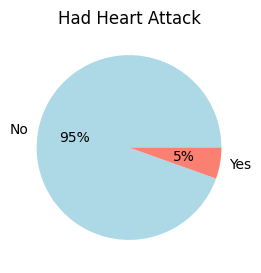

In [ ]:
da2=df['HadHeartAttack'].value_counts().reset_index(name='count')
plt.figure(figsize= (3,3))
plt.pie(da2['count'], labels=['No', 'Yes'], colors=['lightblue', 'salmon'],autopct='%.0f%%')
plt.title('Had Heart Attack')

# Visualization \#2 - Dataset Respondents by State

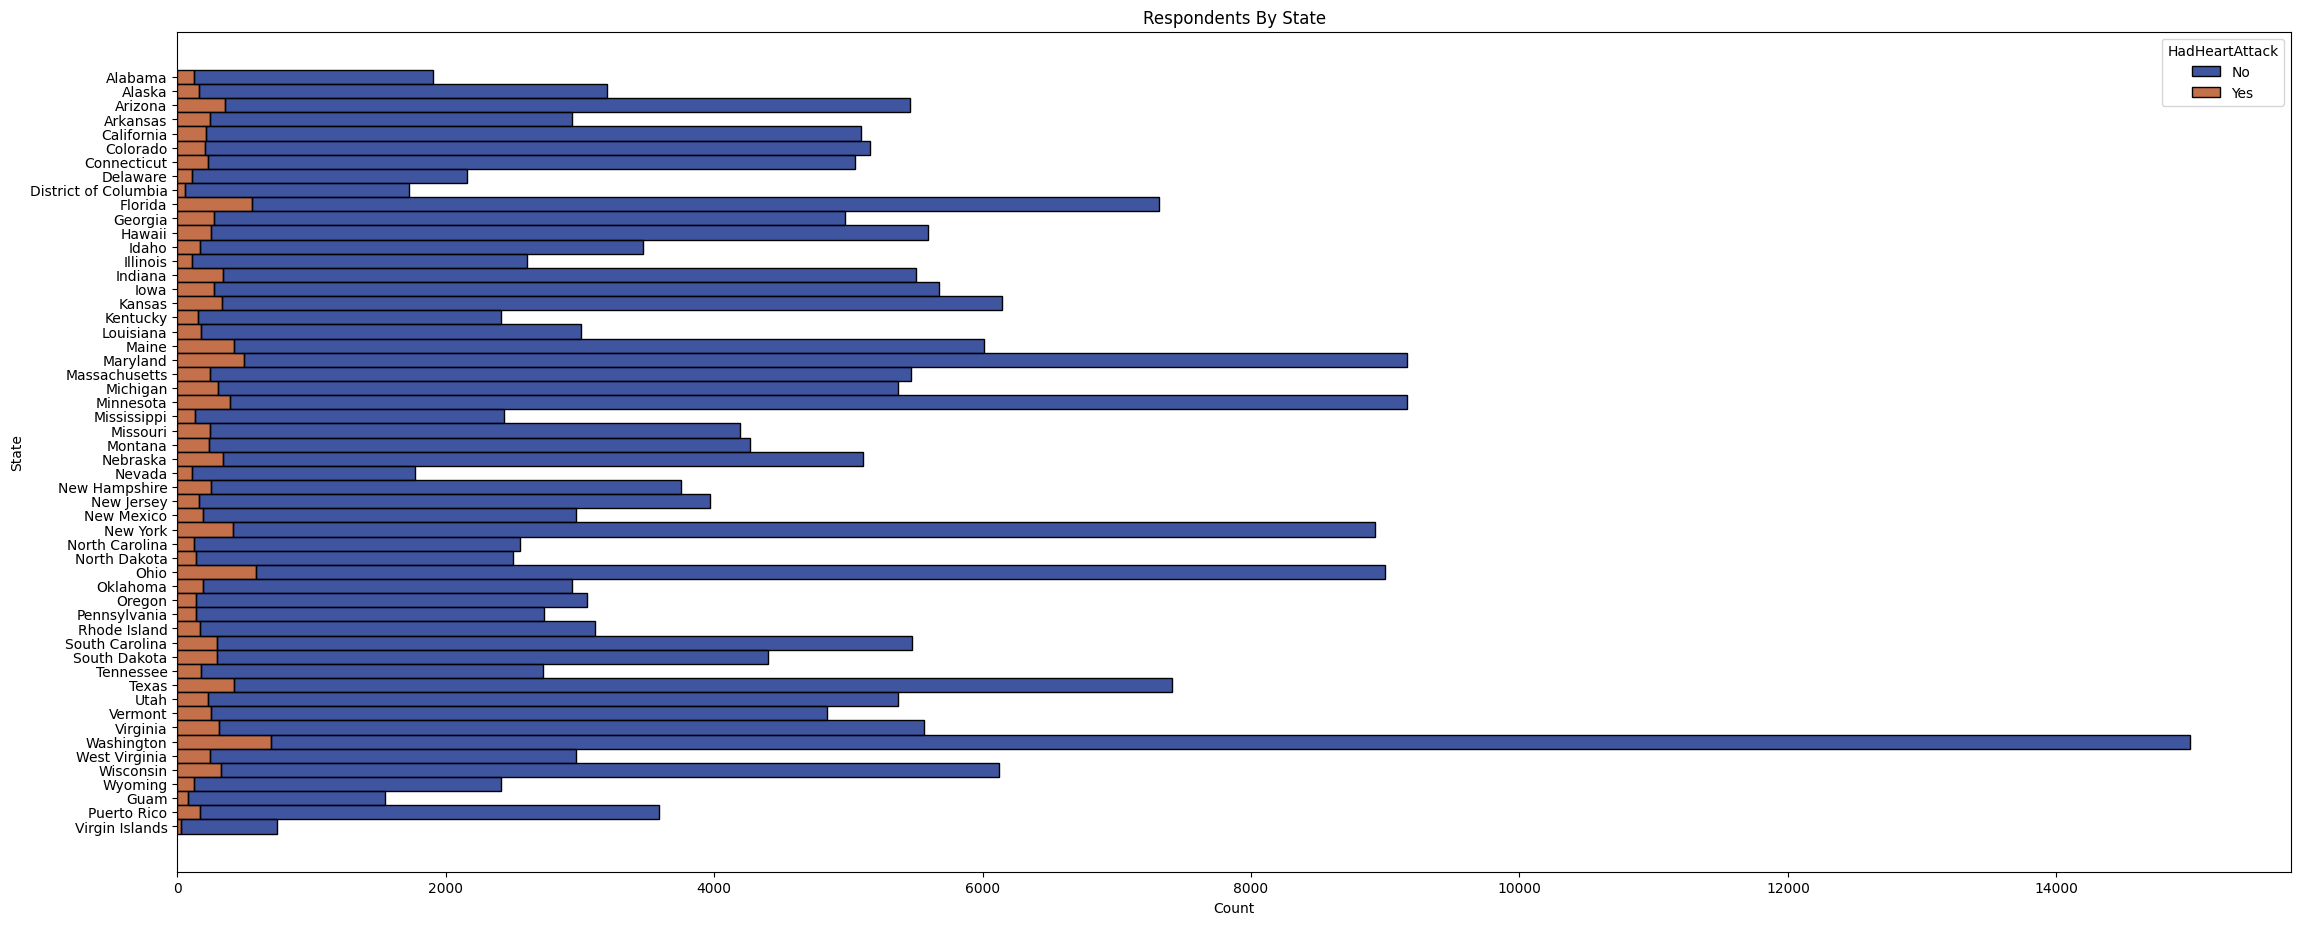

In [ ]:
plt.figure(figsize=(60,24))
plt.subplot(2,2,1)
sns.histplot(df, y='State', hue='HadHeartAttack', binwidth=1, palette='dark', multiple='stack')
plt.title('Respondents By State')
plt.show()

# Visualization \#3 - Full Dataset Heatmap

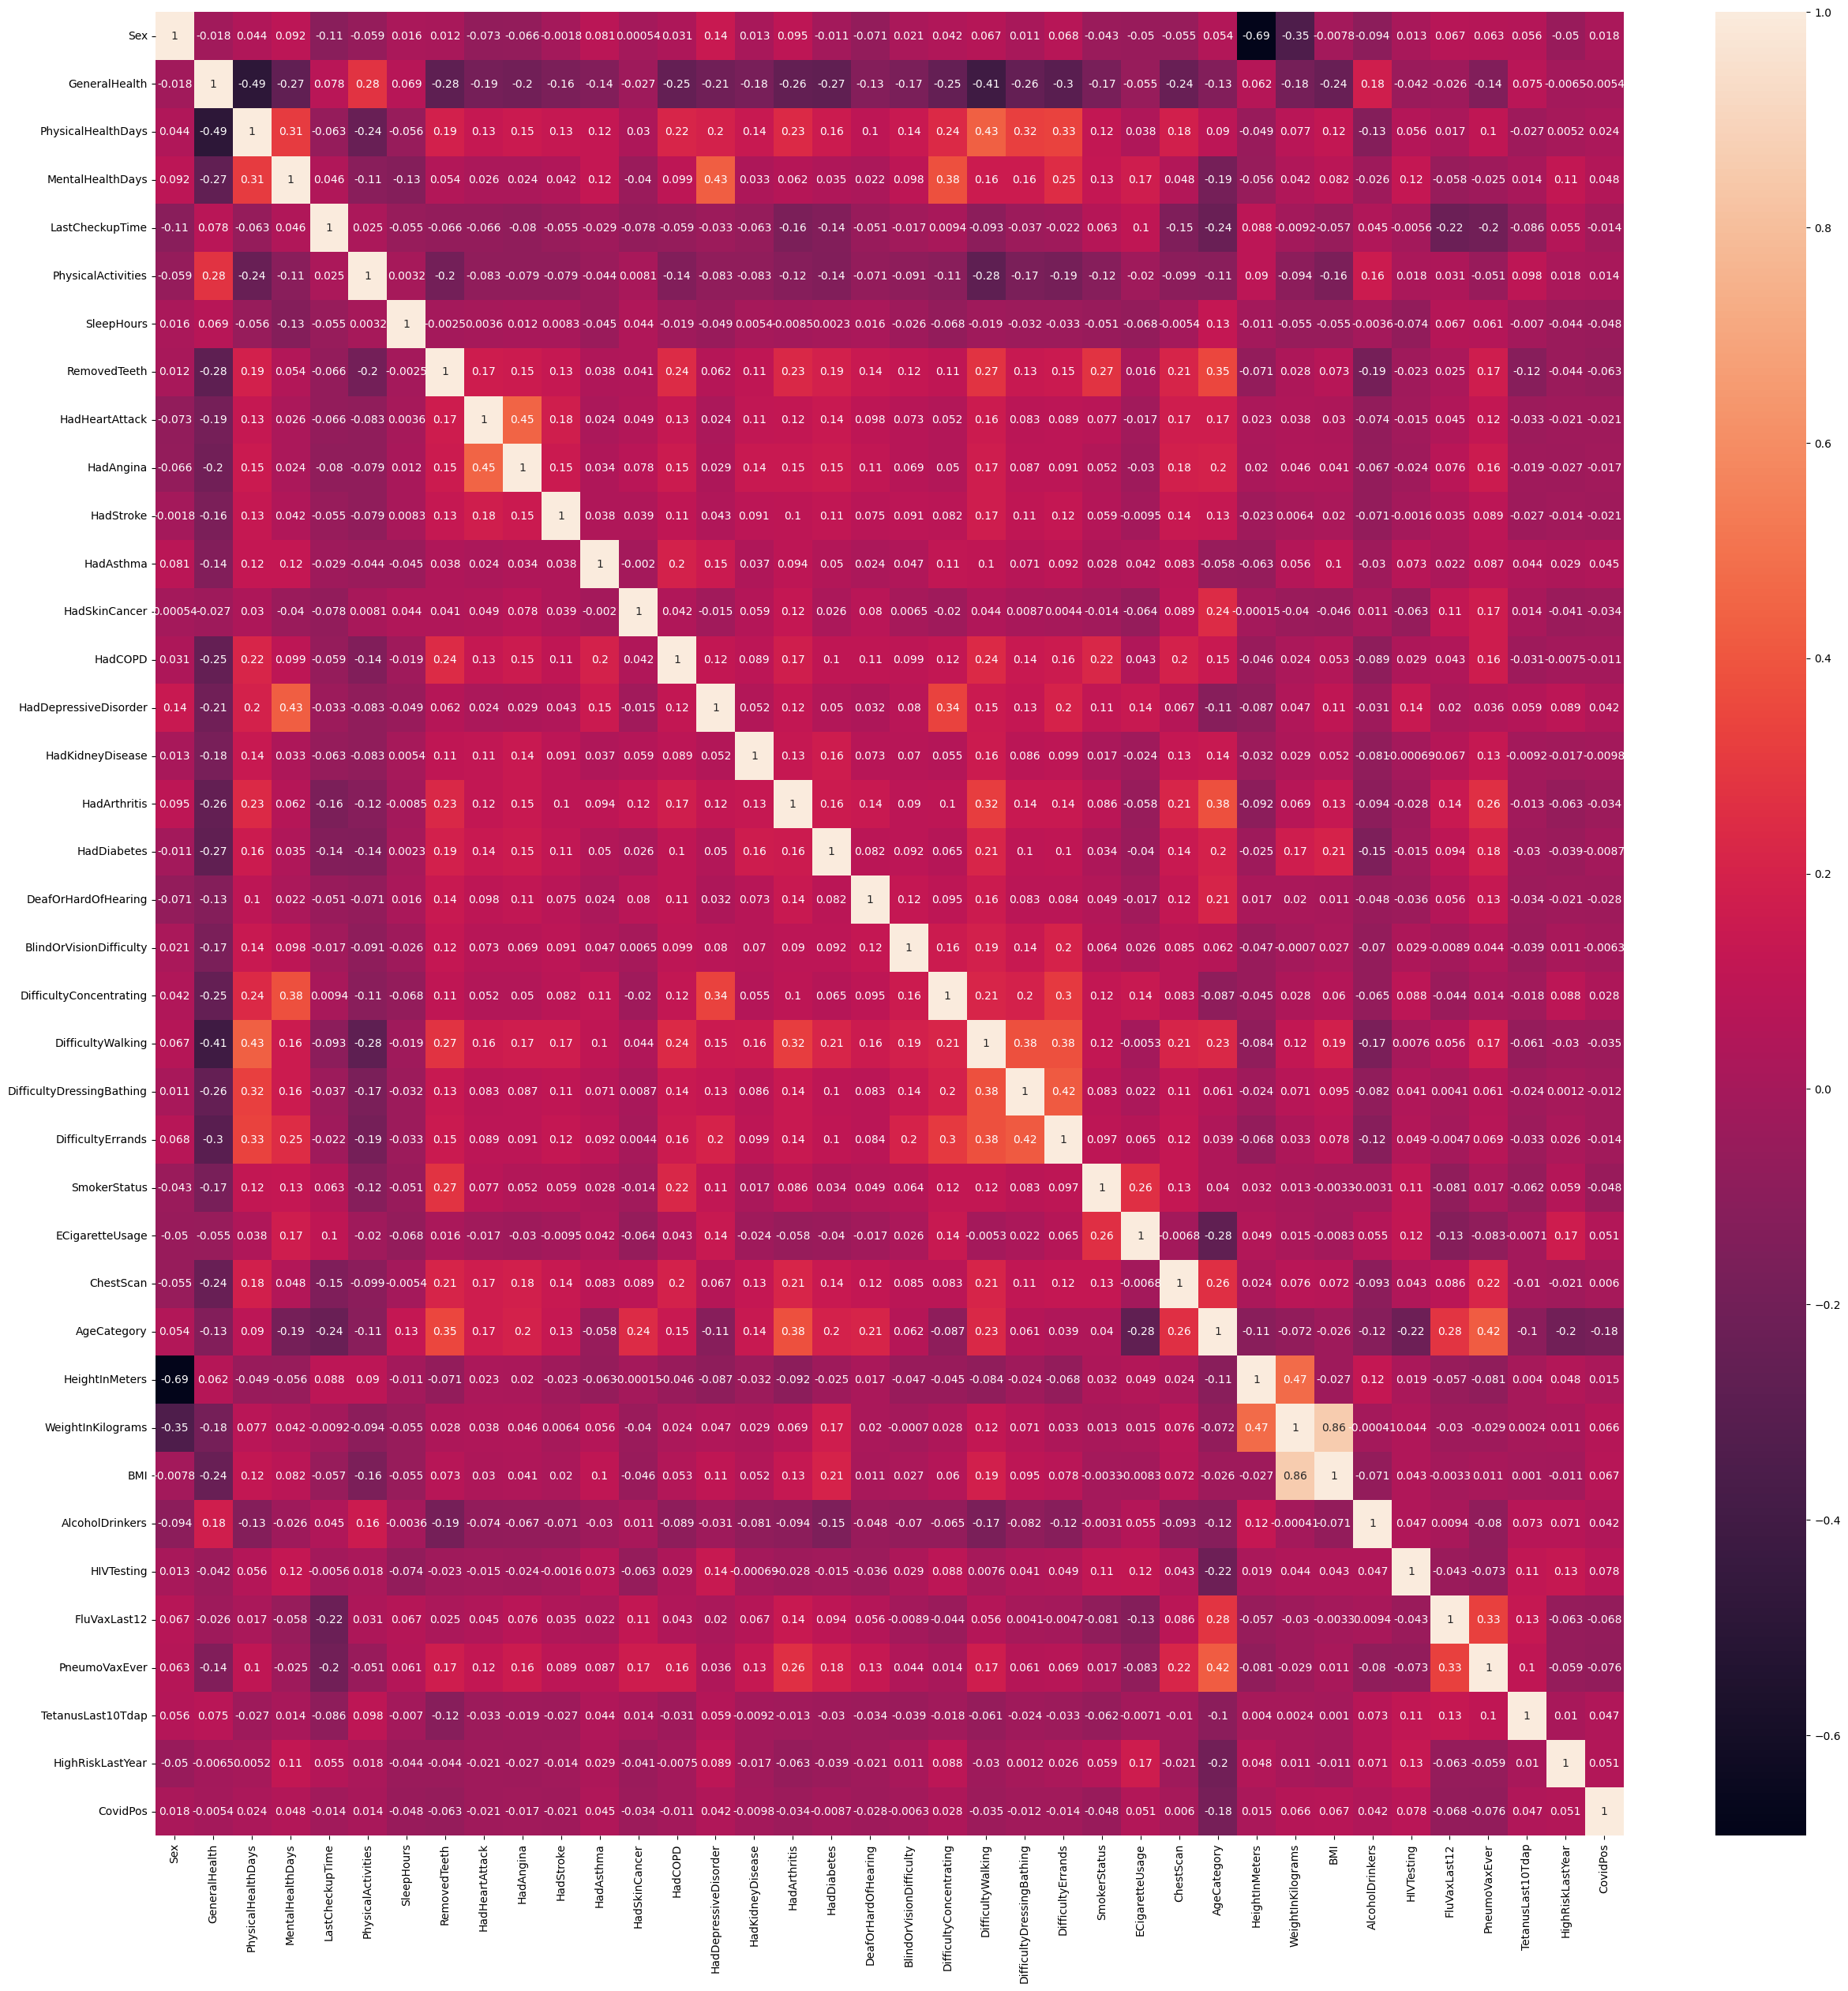

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(enum_df.corr(), annot=True)
plt.show()

# Reduced Dataset Heatmap

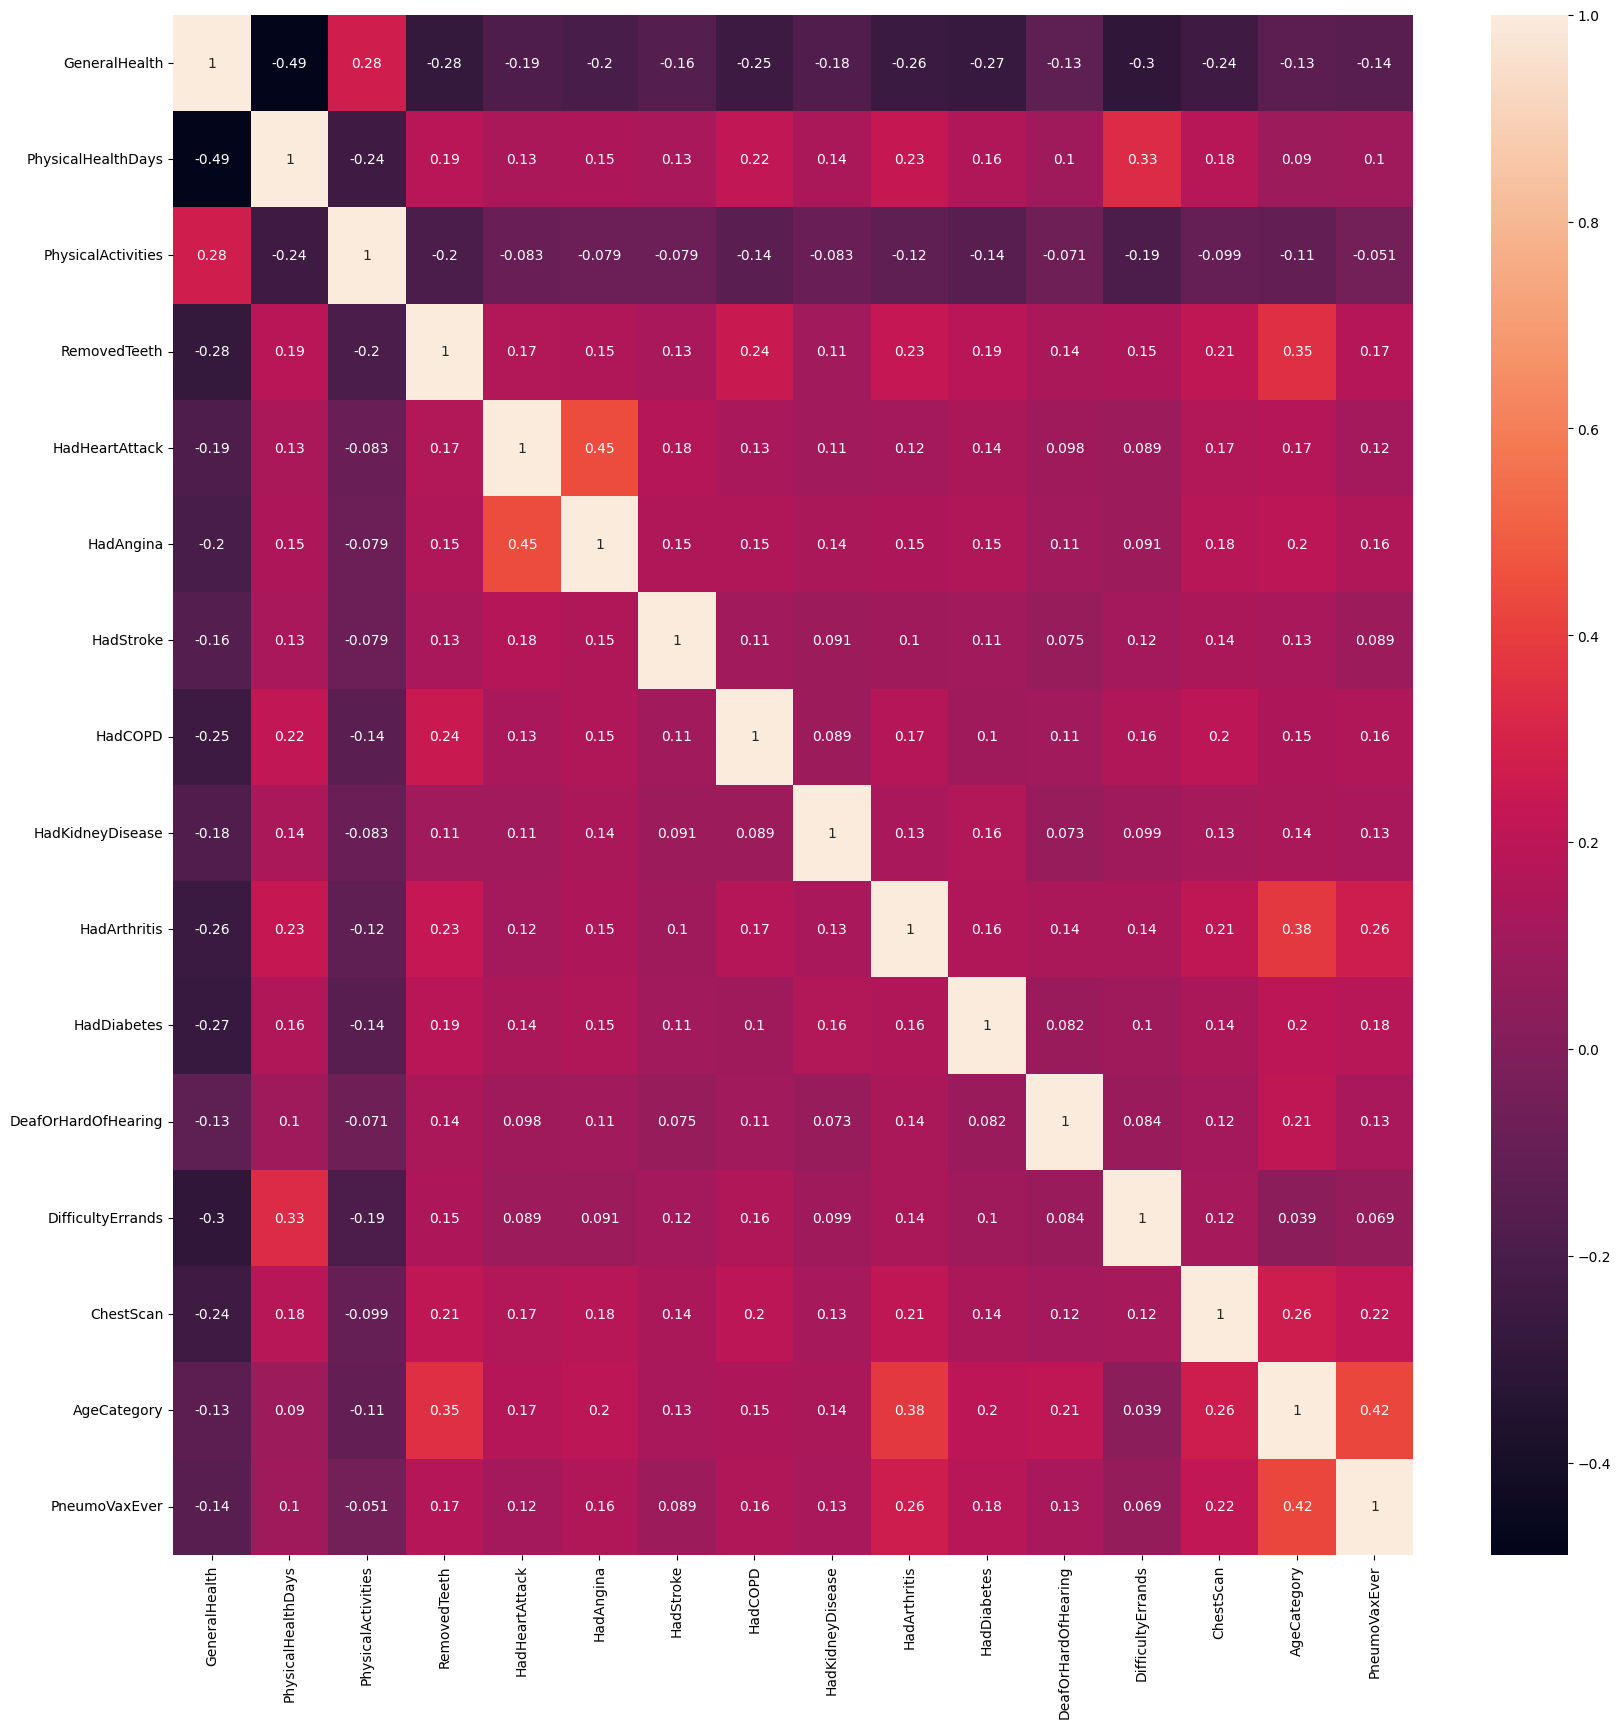

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

# Reduced Dataset - Separating Dependent Variable

In [ ]:
y_red = final_df.values[:,4]
x_red_df = final_df.drop(['HadHeartAttack', ],axis=1)
x_red = x_red_df.values

# Random Oversampling
This step randomly duplicates elements from the under-represented minority class in order to make the dataset more balanced. Since most people responding to the survey this dataset is based on did not have heart disease, oversampling helps train the model to better predict respondents who did have heart disease, which appear far fewer times in the dataset.

In [ ]:
overSampler = RandomOverSampler()
x_red_ros, y_red_ros = overSampler.fit_resample(x_red, y_red)
x_red_train_ros, x_red_test_ros, y_red_train_ros, y_red_test_ros = model_selection.train_test_split(x_red_ros, y_red_ros, test_size=0.25)

# Random Forest Classifier Model
In this step, the dataset is split into a training and testng group. A random forest classifier is then trained on the data.

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     58293
         1.0       0.91      0.93      0.92     57996

    accuracy                           0.92    116289
   macro avg       0.92      0.92      0.92    116289
weighted avg       0.92      0.92      0.92    116289



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

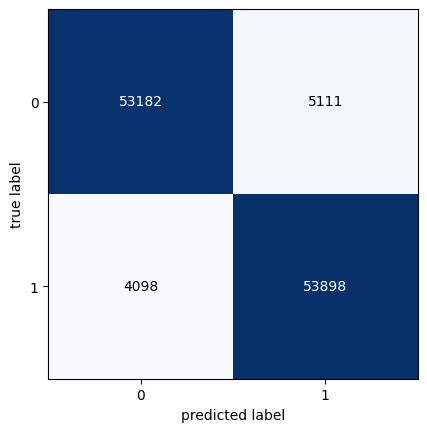

In [ ]:
rfc = RandomForestClassifier()
x_red_train_rf, x_red_test_rf, y_red_train_rf, y_red_test_rf = model_selection.train_test_split(x_red_ros, y_red_ros, test_size=0.25)
rfc.fit(x_red_train_rf, y_red_train_rf)

y_red_pred_rf = rfc.predict(x_red_test_rf)

print(metrics.classification_report(y_red_test_rf, y_red_pred_rf))

cm_rd_os_rf= metrics.confusion_matrix(y_red_test_rf, y_red_pred_rf)
plot_confusion_matrix(cm_rd_os_rf)

Precision, recall, and f1 scores for the trained model are all above 90%.

# Stratified K-Fold
*Approx. 3-4 minutes to execute*

This step estimates the model's ability to make accurate predictions based on new data not in the training or test datasets.

This metric is important for understanding the model's usefulness in real-world applications.

In [ ]:
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
stratified_lst = []

for train_index, test_index in skf.split(x_red,y_red):
    x_train_fold, x_test_fold = x_red_ros[train_index], x_red_ros[test_index]
    y_train_fold, y_test_fold = y_red_ros[train_index], y_red_ros[test_index]

    rfc.fit(x_train_fold, y_train_fold)

    stratified_lst.append(rfc.score(x_test_fold, y_test_fold))

print('Max Accuracy: ', max(stratified_lst)*100, '%')
print('\nMin Accuracy: ', min(stratified_lst)*100, '%')
print('\nAvg. Accuracy: ', mean(stratified_lst)*100, '%')
print('\nStandard Dev.: ', stdev(stratified_lst))

Max Accuracy:  94.4392504369741 %

Min Accuracy:  93.98804926628999 %

Avg. Accuracy:  94.16982173113986 %

Standard Dev.:  0.0015827920631040604


Results show an average accuracy of over 90%.

# User Interface
*Please scroll down to see output*

In [ ]:
genders=[('Male', 0), ('Female', 1)]
age_ranges=[('18-24',0), ('25-29',1), ('30-34',2), ('35-39',3), ('40-44',4), ('45-49',5), ('50-54',6), ('55-59',7), ('60-64',8), ('65-69',9), ('70-74',10), ('75-79',11), ('80+',12)]
gen_health=[('Poor',0),('Fair',1),('Good',2),('Very Good',3),('Excellent',4)]
teeth_questions=[('No teeth removed',0), ('1 to 5',1), ('6 or more, not all',2), ('All teeth removed',3)]
yes_no=[('Yes', 1),('No', 0)]

highrisk_url='https://github.com/A-Wozzie/C964/blob/main/img/highrisk.png?raw=true'.encode('utf-8')
lowrisk_url='https://github.com/A-Wozzie/C964/blob/main/img/lowrisk.png?raw=true'.encode('utf-8')

demo_radio=widgets.RadioButtons(
    description='',
    options=genders,
    disabled=False,
    value=None,
    index=None,
    label=None
)

age_dropdown=widgets.Dropdown(
    options=age_ranges,
    value=0

)

genhealth_slider=widgets.SelectionSlider(
    options=gen_health,
    disabled=False,
    value=2
)

demo_physhealth=widgets.BoundedIntText(
    value=0,
    min=0,
    max=30,
    step=1,
    disabled=False,
    layout=Layout(width='50px')
)

teeth_dropdown=widgets.Dropdown(
    options=teeth_questions,
    value=0
)

physact_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=1,
   button_style='info'
)

angina_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

stroke_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

copd_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

kidney_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

arthritis_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

diabetes_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

hearing_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

errands_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

chest_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

pneumovax_toggle=widgets.ToggleButtons(
   options=yes_no,
   disabled=False,
   value=0,
   button_style='info'
)

demo_submit=widgets.Button(
    description='SUBMIT',
    button_style='success',
    tooltip='Click to submit'
)

yes_no_list=[]

def yesno_questions():
  for i in range(0,len(health_questions)-1,1):
    print(health_questions[i][0])


def on_button_clicked(b):

  clear_output()
  print('YOUR PREDICTED HEART DISEASE RISK LEVEL:')

  input_arr=[[genhealth_slider.value, demo_physhealth.value, physact_toggle.value, teeth_dropdown.value, angina_toggle.value, stroke_toggle.value, copd_toggle.value, kidney_toggle.value, arthritis_toggle.value, diabetes_toggle.value, hearing_toggle.value, errands_toggle.value, chest_toggle.value, age_dropdown.value, pneumovax_toggle.value]]

  prediction=int(rfc.predict(input_arr))

  if prediction==1:
    img_show=widgets.Image(
        value=highrisk_url,
        format='url',
        width=200,
        height=200
    )

    display(img_show)
    print('You are at greater risk of heart disease.')
    print('NOTE: This does NOT mean that you have heart disease, only that people with similar\nresponses to yours may be more likely to have or develop heart disease.')
    print('')
    print('Please visit your healthcare provider in the near future.')
    print('Various lifestyle changes can help lower you risk.')

  else:
    img_show=widgets.Image(
        value=lowrisk_url,
        format='url',
        width=200,
        height=200
      )
    display(img_show)
    print('You are at lower risk of heart disease.')
    print('NOTE: This does NOT mean you don\'t have heart disease.')

  print('')
  print('You can change your selections above and press RE-SUBMIT to rerun this model.\n')

  resubmit_button=widgets.Button(
      description='RE-SUBMIT',
      button_style='success',
      tooltip='Click to re-submit'
  )
  display(resubmit_button)
  resubmit_button.on_click(on_button_clicked)
  print('\n** FOR INFORMATIONAL PURPOSES ONLY. THIS IS NOT MEDICAL ADVICE. **')


print('HEART DISEASE RISK CALCULATOR')
print('')
print('Select your age range:')
display(age_dropdown)
print('')
print('Select your general state of health:')
display(genhealth_slider)
print('')
print('In the last 30 days, how many days\nwere you sick or in poor health?')
display(demo_physhealth)
print('')
print('Have you had any teeth removed?')
display(teeth_dropdown)
print('')
print('Have you done any strenuous physical activity\n(such as sports) in the last 30 days?')
display(physact_toggle)
print('')
print('Have you experienced angina (chest pain)?')
display(angina_toggle)
print('')
print('Have you ever had a stroke?')
display(stroke_toggle)
print('')
print('Do you have COPD?')
display(copd_toggle)
print('')
print('Do you have kidney disease?')
display(kidney_toggle)
print('')
print('Do you have arthritis?')
display(arthritis_toggle)
print('')
print('Do you have diabetes?')
display(diabetes_toggle)
print('')
print('Are you deaf or hard of hearing?')
display(hearing_toggle)
print('')
print('Do you tire easily when doing chores and errands?')
display(errands_toggle)
print('')
print('Have you had a chest scan recently?')
display(chest_toggle)
print('')
print('Have you received the Pneumovax vaccine?')
display(pneumovax_toggle)
print('')

HEART DISEASE RISK CALCULATOR

Select your age range:


Dropdown(options=(('18-24', 0), ('25-29', 1), ('30-34', 2), ('35-39', 3), ('40-44', 4), ('45-49', 5), ('50-54'…


Select your general state of health:


SelectionSlider(index=2, options=(('Poor', 0), ('Fair', 1), ('Good', 2), ('Very Good', 3), ('Excellent', 4)), …


In the last 30 days, how many days
were you sick or in poor health?


BoundedIntText(value=0, layout=Layout(width='50px'), max=30)


Have you had any teeth removed?


Dropdown(options=(('No teeth removed', 0), ('1 to 5', 1), ('6 or more, not all', 2), ('All teeth removed', 3))…


Have you done any strenuous physical activity
(such as sports) in the last 30 days?


ToggleButtons(button_style='info', options=(('Yes', 1), ('No', 0)), value=1)


Have you experienced angina (chest pain)?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Have you ever had a stroke?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Do you have COPD?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Do you have kidney disease?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Do you have arthritis?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Do you have diabetes?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Are you deaf or hard of hearing?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Do you tire easily when doing chores and errands?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Have you had a chest scan recently?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)


Have you received the Pneumovax vaccine?


ToggleButtons(button_style='info', index=1, options=(('Yes', 1), ('No', 0)), value=0)

# Results

In [20]:
display(demo_submit)
demo_submit.on_click(on_button_clicked)

YOUR PREDICTED HEART DISEASE RISK LEVEL:


Image(value=b'https://github.com/A-Wozzie/C964/blob/main/img/highrisk.png?raw=true', format='url', height='200…

You are at greater risk of heart disease.
NOTE: This does NOT mean that you have heart disease, only that people with similar
responses to yours may be more likely to have or develop heart disease.

Please visit your healthcare provider in the near future.
Various lifestyle changes can help lower you risk.

You can change your selections above and press RE-SUBMIT to rerun this model.



Button(button_style='success', description='RE-SUBMIT', style=ButtonStyle(), tooltip='Click to re-submit')


** FOR INFORMATIONAL PURPOSES ONLY. THIS IS NOT MEDICAL ADVICE. **
